In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Data collection

In [2]:
#Step 1: Data collection
# Load the data.
data = pd.read_excel("pp-complete-2.xlsx")

In [3]:
dataFrame = pd.DataFrame(data)

# Understanding the Dataset

In [4]:
# Step 2: Understanding the data.
# --Preliminary data exploration.
data_info = dataFrame.info()

dataFrame
# data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325917 entries, 0 to 325916
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Id                                 325917 non-null  object        
 1   Price                              325917 non-null  int64         
 2   Date                               325917 non-null  datetime64[ns]
 3   Postcode                           325628 non-null  object        
 4   Property type                      325917 non-null  object        
 5   Old/New                            325917 non-null  object        
 6   Duration                           325917 non-null  object        
 7   PAON                               325499 non-null  object        
 8   SAON                               28957 non-null   object        
 9   Street                             325703 non-null  object        
 10  Locality            

,Id,Price,Date,Postcode,Property type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,Category type,Record Status - monthly file only
0,{8A747D49-66BA-42F8-BDB1-D1158972DEBD},45000,1995-01-09,LS27 0LS,S,N,F,85,NaN,HOWDENCLOUGH ROAD,MORLEY,LEEDS,LEEDS,WEST YORKSHIRE,A,A
1,{60BD2B85-D388-43CD-AB64-D116023E166F},53500,1995-04-28,LS17 8QG,S,N,F,10,NaN,BROOKHILL DRIVE,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A
2,{ED1D075F-2CE8-4A00-B08B-B4AFB064C496},53500,1995-06-30,LS25 2JB,S,N,F,3,NaN,CRIMPLE GREEN,GARFORTH,LEEDS,LEEDS,WEST YORKSHIRE,A,A
3,{93DB7173-B239-4C95-9CBB-73E4A6B783F4},185000,1995-09-04,LS17 0AY,D,Y,F,WELLFIELD HOUSE,NaN,MAIN STREET,WEETON,LEEDS,HARROGATE,NORTH YORKSHIRE,A,A
4,{32F98759-D684-4D32-BF97-77777104B7A2},190000,1995-12-21,LS14 3EG,D,N,F,THE VICARAGE,NaN,CHURCH HILL,THORNER,LEEDS,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,{1061746E-B0A8-3C34-E063-4804A8C0F9E7},135000,2024-01-12,LS11 9RQ,T,N,F,47,NaN,INGRAM ROAD,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325913,{1061746E-B0AE-3C34-E063-4804A8C0F9E7},161000,2024-01-19,LS13 3NP,T,N,F,20,NaN,WARRELS STREET,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325914,{1061746E-B0FC-3C34-E063-4804A8C0F9E7},132500,2024-01-19,LS13 4LD,F,N,L,"THE ELMS, 46",4,HENCONNER LANE,BRAMLEY,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325915,{1061746E-B156-3C34-E063-4804A8C0F9E7},345000,2024-01-12,LS19 6QW,T,N,F,9,NaN,WEAVERS FOLD,RAWDON,LEEDS,LEEDS,WEST YORKSHIRE,A,A


### Null Value detection

In [5]:
# Let's identify columns with missing or null values
null_values = dataFrame.isnull()
null_values_count = null_values.sum()
null_values_count

Id                                        0
Price                                     0
Date                                      0
Postcode                                289
Property type                             0
Old/New                                   0
Duration                                  0
PAON                                    418
SAON                                 296960
Street                                  214
Locality                             113771
Town/City                                 0
District                                  0
County                                    0
Category type                             0
Record Status - monthly file only         0
dtype: int64

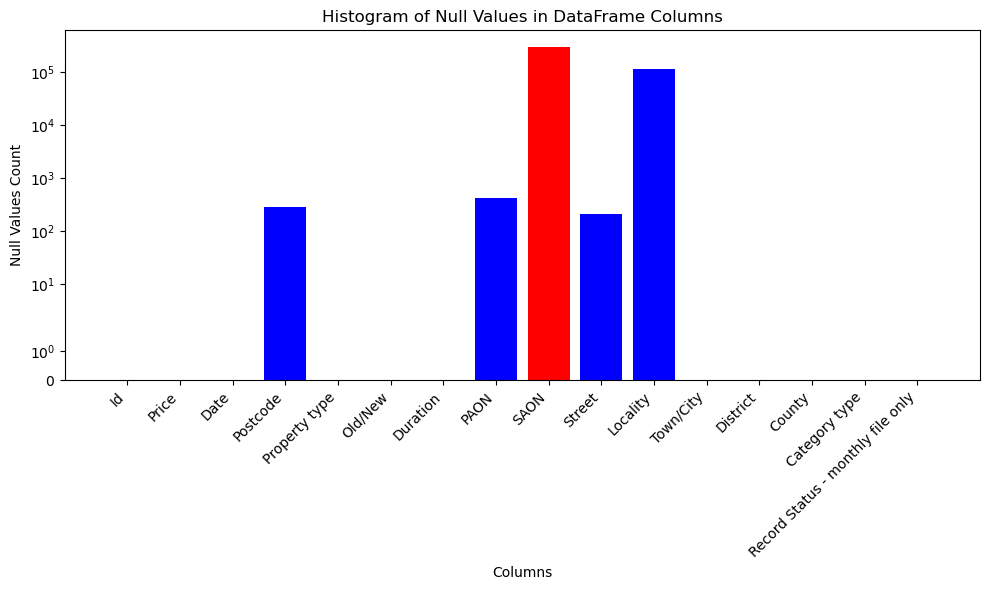

In [6]:
# Finding the column with the highest count of null values
max_null_column = null_values_count.idxmax()

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(null_values_count.index, null_values_count.values, color=['blue' if col != max_null_column else 'red' for col in null_values_count.index])

# Adding labels and title
plt.yscale('symlog') 
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.title('Histogram of Null Values in DataFrame Columns')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Error checking (For key columns)

In [7]:
#-- Error checking (Ensure the target variable Price has no errors)
# a) No negative values
# b) No Outliers (Overly high or over low values)
# c) Categorical Analysis (Examine fequenceis of occurance:-Property type, Old/New, Duration)

# A No Negative values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
price_describe = dataFrame['Price'].describe()
price_negative_check = (dataFrame['Price'] < 0).sum()
# price_negative_check
# price_describe 
data['Price'].describe()

count      325917.000
mean       170419.227
std       1431267.171
min           100.000
25%         72000.000
50%        122000.000
75%        186000.000
max     494400000.000
Name: Price, dtype: float64

## Outlier detection

Lower 72000.0
Uper 186000.0
IQR 114000.0
Q1_outliers -99000.0
Q3_outliers 357000.0


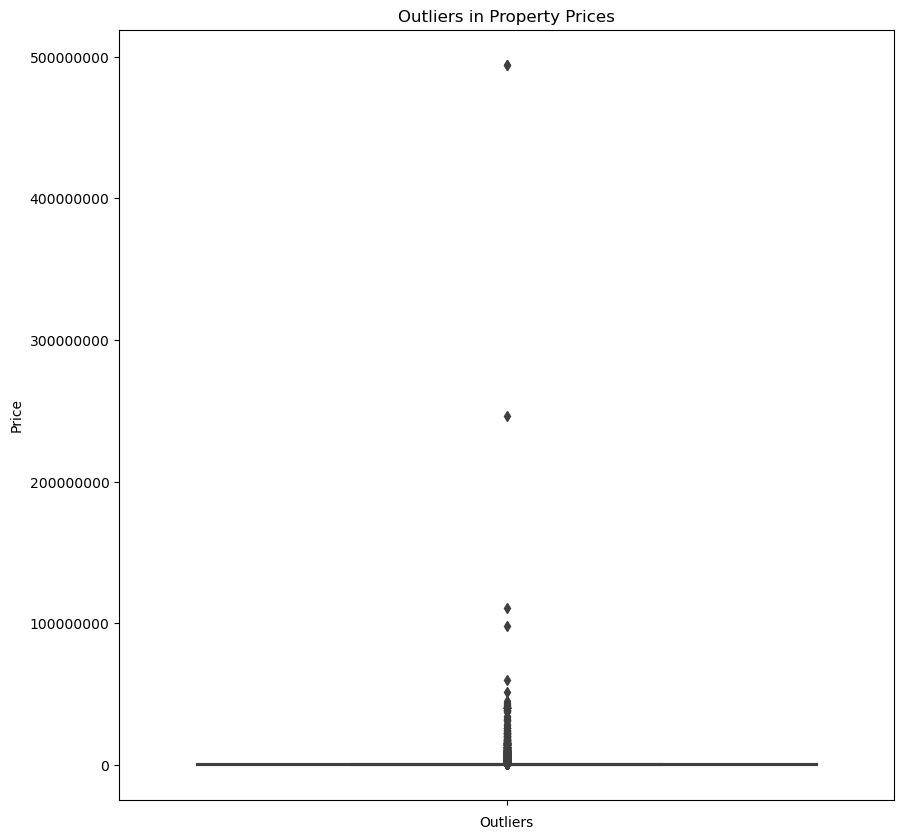

In [8]:
# B. Outliers (Overly high or low values)

price = dataFrame['Price']
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3-Q1
Q1_outliers = Q1 - 1.5 * IQR
Q3_outliers = Q3 + (1.5 * IQR)
print("Lower", Q1)
print("Uper", Q3)
print("IQR", IQR)
print("Q1_outliers", Q1_outliers)
print("Q3_outliers", Q3_outliers)

# Define outliers
outliers = dataFrame[(price < (Q1 - 1.5 * IQR)) | (price > (Q3 + 1.5 * IQR))]


# Plotting the boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=dataFrame, y='Price')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Outliers in Property Prices')
plt.xlabel('Prices')
plt.xlabel('Outliers')
plt.show()

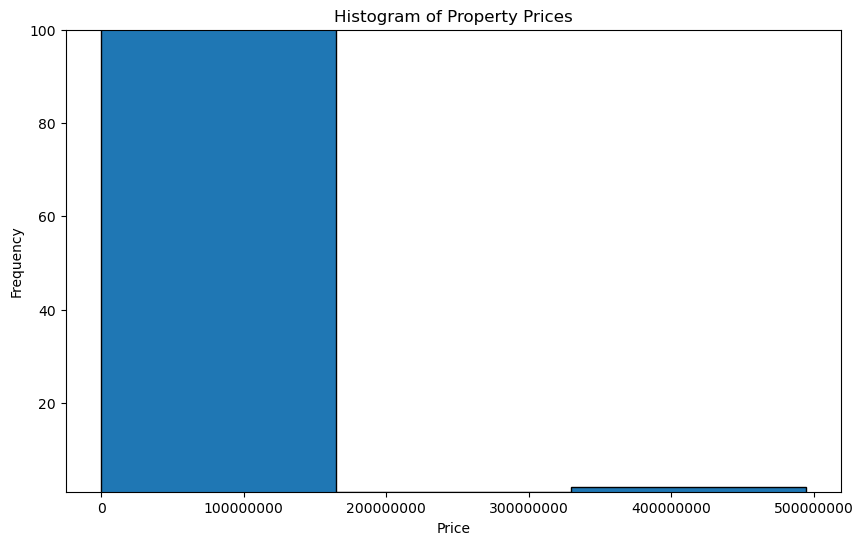

In [9]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(price[price <= 494400000], bins=3, edgecolor='black')
plt.ticklabel_format(style='plain', axis='x')
plt.yscale("linear")
plt.ylim(1, 100)
plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Skewness of the target variable:  273.5094176977509
Price distribution is skewed to the right (Positive)


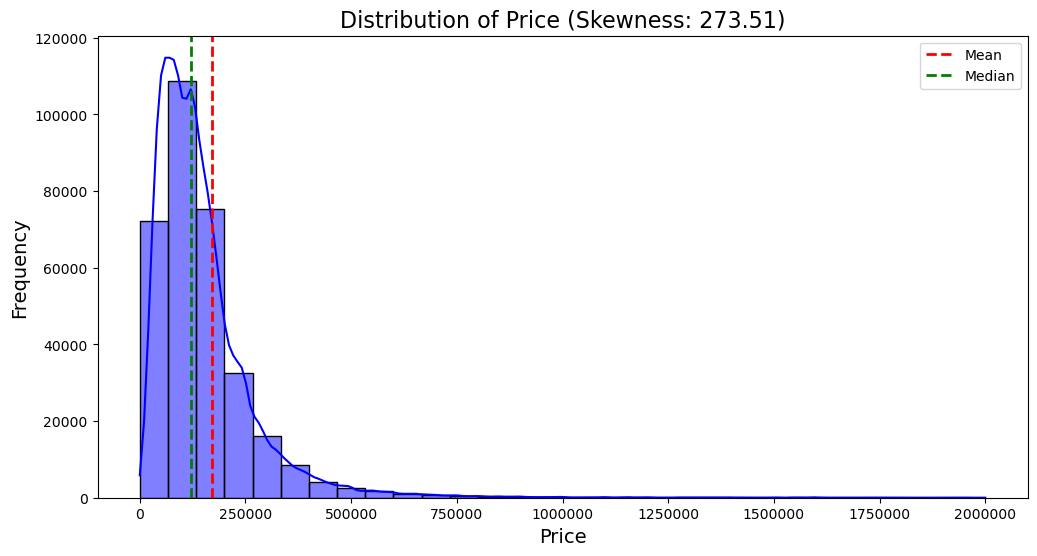

In [10]:
# Target Variable Analysis - Price
skewness = skew(price)
print('Skewness of the target variable: ', skewness)
if skewness > 0:
    print("Price distribution is skewed to the right (Positive)")
else:
    print("Price distribution is skewed to the left (Negative)")
    
# Visual representation
plt.figure(figsize=(12, 6))
sns.histplot(price[price < 2000000], kde=True, bins=30, color='blue')
plt.title(f'Distribution of Price (Skewness: {skewness:.2f})', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequency', fontsize=14)
plt.axvline(price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()



In [11]:
## C. Categorical Analysis
# Frequency tables for 'Property type', 'Old/New', 'Street' and 'District'
property_type_counts = dataFrame['Property type'].value_counts()
old_new_counts = dataFrame['Old/New'].value_counts()
street_counts = dataFrame['Street'].value_counts()
district_counts = dataFrame['District'].value_counts()
county = dataFrame['County'].value_counts()

property_type_counts, old_new_counts, street_counts, district_counts, county

(S    115409
 T    108353
 D     49570
 F     48139
 O      4446
 Name: Property type, dtype: int64,
 N    291924
 Y     33993
 Name: Old/New, dtype: int64,
 MAIN STREET          922
 LEEDS ROAD           915
 HARROGATE ROAD       903
 EAST STREET          902
 CROSS GREEN LANE     888
                     ... 
 HOLBECK MOOR ROAD      1
 ROCK TERRACE           1
 PLANTATION WAY         1
 INGLETON DRIVE         1
 GREENFIELD COURT       1
 Name: Street, Length: 9147, dtype: int64,
 LEEDS              317567
 SELBY                7188
 HARROGATE             673
 NORTH YORKSHIRE       267
 BRADFORD               89
 WAKEFIELD              77
 KIRKLEES               40
 CALDERDALE             12
 YORK                    1
 RYEDALE                 1
 HAMBLETON               1
 BARNSLEY                1
 Name: District, dtype: int64,
 WEST YORKSHIRE     317785
 NORTH YORKSHIRE      8130
 YORK                    1
 SOUTH YORKSHIRE         1
 Name: County, dtype: int64)

# Data Cleaning

##### 1. Get all data for Leeds
##### 2. Remove Identified Null values
##### 3. Remove irrelevant columns
##### 4. Remove duplicates rows if any
##### 5. Remove outliers

### Get all data for Leeds

In [12]:
# Step 2: Data Cleaning.
Leeds_dataset = dataFrame[dataFrame['District'] == 'LEEDS']
Leeds_dataset

,Id,Price,Date,Postcode,Property type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,Category type,Record Status - monthly file only
0,{8A747D49-66BA-42F8-BDB1-D1158972DEBD},45000,1995-01-09,LS27 0LS,S,N,F,85,NaN,HOWDENCLOUGH ROAD,MORLEY,LEEDS,LEEDS,WEST YORKSHIRE,A,A
1,{60BD2B85-D388-43CD-AB64-D116023E166F},53500,1995-04-28,LS17 8QG,S,N,F,10,NaN,BROOKHILL DRIVE,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A
2,{ED1D075F-2CE8-4A00-B08B-B4AFB064C496},53500,1995-06-30,LS25 2JB,S,N,F,3,NaN,CRIMPLE GREEN,GARFORTH,LEEDS,LEEDS,WEST YORKSHIRE,A,A
4,{32F98759-D684-4D32-BF97-77777104B7A2},190000,1995-12-21,LS14 3EG,D,N,F,THE VICARAGE,NaN,CHURCH HILL,THORNER,LEEDS,LEEDS,WEST YORKSHIRE,A,A
5,{67415EE2-B5D8-40D4-B3B2-D1165774B759},33500,1995-12-21,LS6 4DT,F,N,L,MASHAM COURT,20,SHAW LANE,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,{1061746E-B0A8-3C34-E063-4804A8C0F9E7},135000,2024-01-12,LS11 9RQ,T,N,F,47,NaN,INGRAM ROAD,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325913,{1061746E-B0AE-3C34-E063-4804A8C0F9E7},161000,2024-01-19,LS13 3NP,T,N,F,20,NaN,WARRELS STREET,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325914,{1061746E-B0FC-3C34-E063-4804A8C0F9E7},132500,2024-01-19,LS13 4LD,F,N,L,"THE ELMS, 46",4,HENCONNER LANE,BRAMLEY,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325915,{1061746E-B156-3C34-E063-4804A8C0F9E7},345000,2024-01-12,LS19 6QW,T,N,F,9,NaN,WEAVERS FOLD,RAWDON,LEEDS,LEEDS,WEST YORKSHIRE,A,A


### Remove Null values

In [13]:
df = Leeds_dataset.copy()
df_clean_col = df.drop(['SAON', 'Locality'], axis=1) # They both have incredibly high number of null values
df_clean_col
df_clean = df_clean_col.dropna()
df_clean

,Id,Price,Date,Postcode,Property type,Old/New,Duration,PAON,Street,Town/City,District,County,Category type,Record Status - monthly file only
0,{8A747D49-66BA-42F8-BDB1-D1158972DEBD},45000,1995-01-09,LS27 0LS,S,N,F,85,HOWDENCLOUGH ROAD,LEEDS,LEEDS,WEST YORKSHIRE,A,A
1,{60BD2B85-D388-43CD-AB64-D116023E166F},53500,1995-04-28,LS17 8QG,S,N,F,10,BROOKHILL DRIVE,LEEDS,LEEDS,WEST YORKSHIRE,A,A
2,{ED1D075F-2CE8-4A00-B08B-B4AFB064C496},53500,1995-06-30,LS25 2JB,S,N,F,3,CRIMPLE GREEN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
4,{32F98759-D684-4D32-BF97-77777104B7A2},190000,1995-12-21,LS14 3EG,D,N,F,THE VICARAGE,CHURCH HILL,LEEDS,LEEDS,WEST YORKSHIRE,A,A
5,{67415EE2-B5D8-40D4-B3B2-D1165774B759},33500,1995-12-21,LS6 4DT,F,N,L,MASHAM COURT,SHAW LANE,LEEDS,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,{1061746E-B0A8-3C34-E063-4804A8C0F9E7},135000,2024-01-12,LS11 9RQ,T,N,F,47,INGRAM ROAD,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325913,{1061746E-B0AE-3C34-E063-4804A8C0F9E7},161000,2024-01-19,LS13 3NP,T,N,F,20,WARRELS STREET,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325914,{1061746E-B0FC-3C34-E063-4804A8C0F9E7},132500,2024-01-19,LS13 4LD,F,N,L,"THE ELMS, 46",HENCONNER LANE,LEEDS,LEEDS,WEST YORKSHIRE,A,A
325915,{1061746E-B156-3C34-E063-4804A8C0F9E7},345000,2024-01-12,LS19 6QW,T,N,F,9,WEAVERS FOLD,LEEDS,LEEDS,WEST YORKSHIRE,A,A


### Remove Irrelevant Columns

In [14]:
dataset = df_clean.drop(['Id', 'Postcode', 'PAON', 'Town/City',  'District',  'County', 'Category type', 'Record Status - monthly file only'], axis=1)
dataset

,Price,Date,Property type,Old/New,Duration,Street
0,45000,1995-01-09,S,N,F,HOWDENCLOUGH ROAD
1,53500,1995-04-28,S,N,F,BROOKHILL DRIVE
2,53500,1995-06-30,S,N,F,CRIMPLE GREEN
4,190000,1995-12-21,D,N,F,CHURCH HILL
5,33500,1995-12-21,F,N,L,SHAW LANE
...,...,...,...,...,...,...
325912,135000,2024-01-12,T,N,F,INGRAM ROAD
325913,161000,2024-01-19,T,N,F,WARRELS STREET
325914,132500,2024-01-19,F,N,L,HENCONNER LANE
325915,345000,2024-01-12,T,N,F,WEAVERS FOLD


### Remove Duplicate rows 

In [15]:
dataset = dataset.drop_duplicates()
dataset

,Price,Date,Property type,Old/New,Duration,Street
0,45000,1995-01-09,S,N,F,HOWDENCLOUGH ROAD
1,53500,1995-04-28,S,N,F,BROOKHILL DRIVE
2,53500,1995-06-30,S,N,F,CRIMPLE GREEN
4,190000,1995-12-21,D,N,F,CHURCH HILL
5,33500,1995-12-21,F,N,L,SHAW LANE
...,...,...,...,...,...,...
325912,135000,2024-01-12,T,N,F,INGRAM ROAD
325913,161000,2024-01-19,T,N,F,WARRELS STREET
325914,132500,2024-01-19,F,N,L,HENCONNER LANE
325915,345000,2024-01-12,T,N,F,WEAVERS FOLD


### Remove Outliers

In [16]:
# Remove all prices below $10,000 and above $500,000
#dataset = dataset[(dataset['Price'] < 500000) & (dataset['Price'] > 10000)]
data_without_outliers = dataset[~dataset.index.isin(outliers.index)]
data_without_outliers

,Price,Date,Property type,Old/New,Duration,Street
0,45000,1995-01-09,S,N,F,HOWDENCLOUGH ROAD
1,53500,1995-04-28,S,N,F,BROOKHILL DRIVE
2,53500,1995-06-30,S,N,F,CRIMPLE GREEN
4,190000,1995-12-21,D,N,F,CHURCH HILL
5,33500,1995-12-21,F,N,L,SHAW LANE
...,...,...,...,...,...,...
325912,135000,2024-01-12,T,N,F,INGRAM ROAD
325913,161000,2024-01-19,T,N,F,WARRELS STREET
325914,132500,2024-01-19,F,N,L,HENCONNER LANE
325915,345000,2024-01-12,T,N,F,WEAVERS FOLD


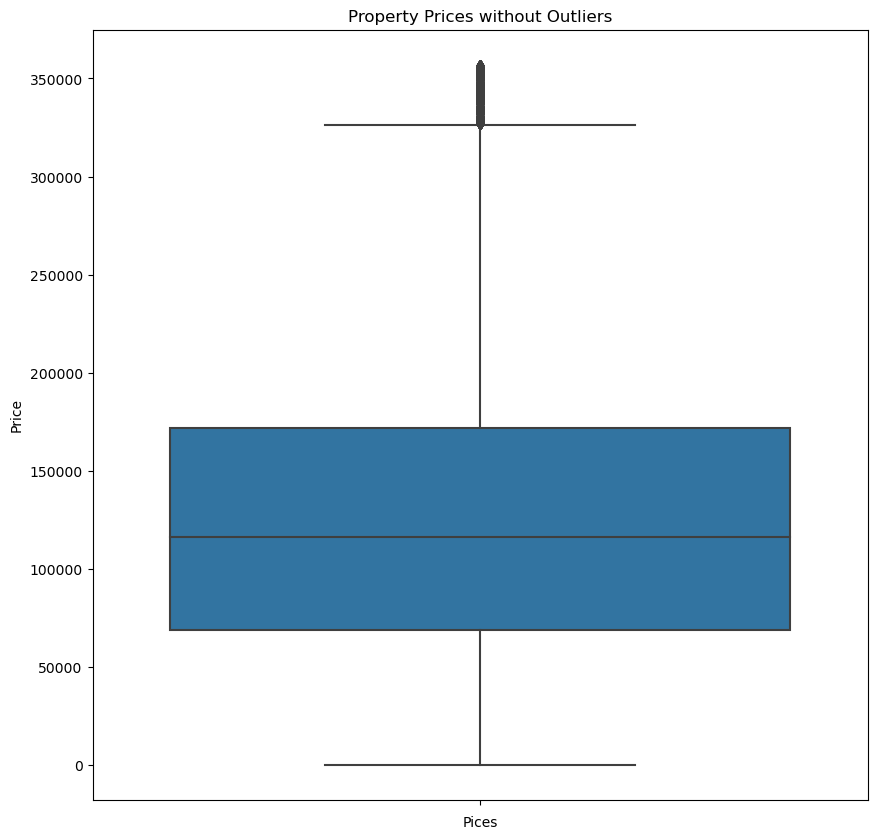

In [17]:
# Plotting the boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_without_outliers, y='Price')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Property Prices without Outliers')
plt.xlabel('Prices')
plt.xlabel('Pices')
plt.show()

# Data Transformation

In [18]:
# Step 3. Data transformation
# a) Transform date into Month and year
# b) transform categorical values into numerical values
# c) Correct Skeweness
# d) Scaling/Normalization: Apply scaling to the Price

### Transform date into Month and year

In [19]:
dataset = data_without_outliers.copy()
date = pd.to_datetime(dataset['Date']) 
year = date.dt.year
month = date.dt.month
dataset['Year'] = year
dataset['Month'] = month


In [20]:
# dataset = dataset.drop(['Date'], axis=1)
dataset

,Price,Date,Property type,Old/New,Duration,Street,Year,Month
0,45000,1995-01-09,S,N,F,HOWDENCLOUGH ROAD,1995,1
1,53500,1995-04-28,S,N,F,BROOKHILL DRIVE,1995,4
2,53500,1995-06-30,S,N,F,CRIMPLE GREEN,1995,6
4,190000,1995-12-21,D,N,F,CHURCH HILL,1995,12
5,33500,1995-12-21,F,N,L,SHAW LANE,1995,12
...,...,...,...,...,...,...,...,...
325912,135000,2024-01-12,T,N,F,INGRAM ROAD,2024,1
325913,161000,2024-01-19,T,N,F,WARRELS STREET,2024,1
325914,132500,2024-01-19,F,N,L,HENCONNER LANE,2024,1
325915,345000,2024-01-12,T,N,F,WEAVERS FOLD,2024,1


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

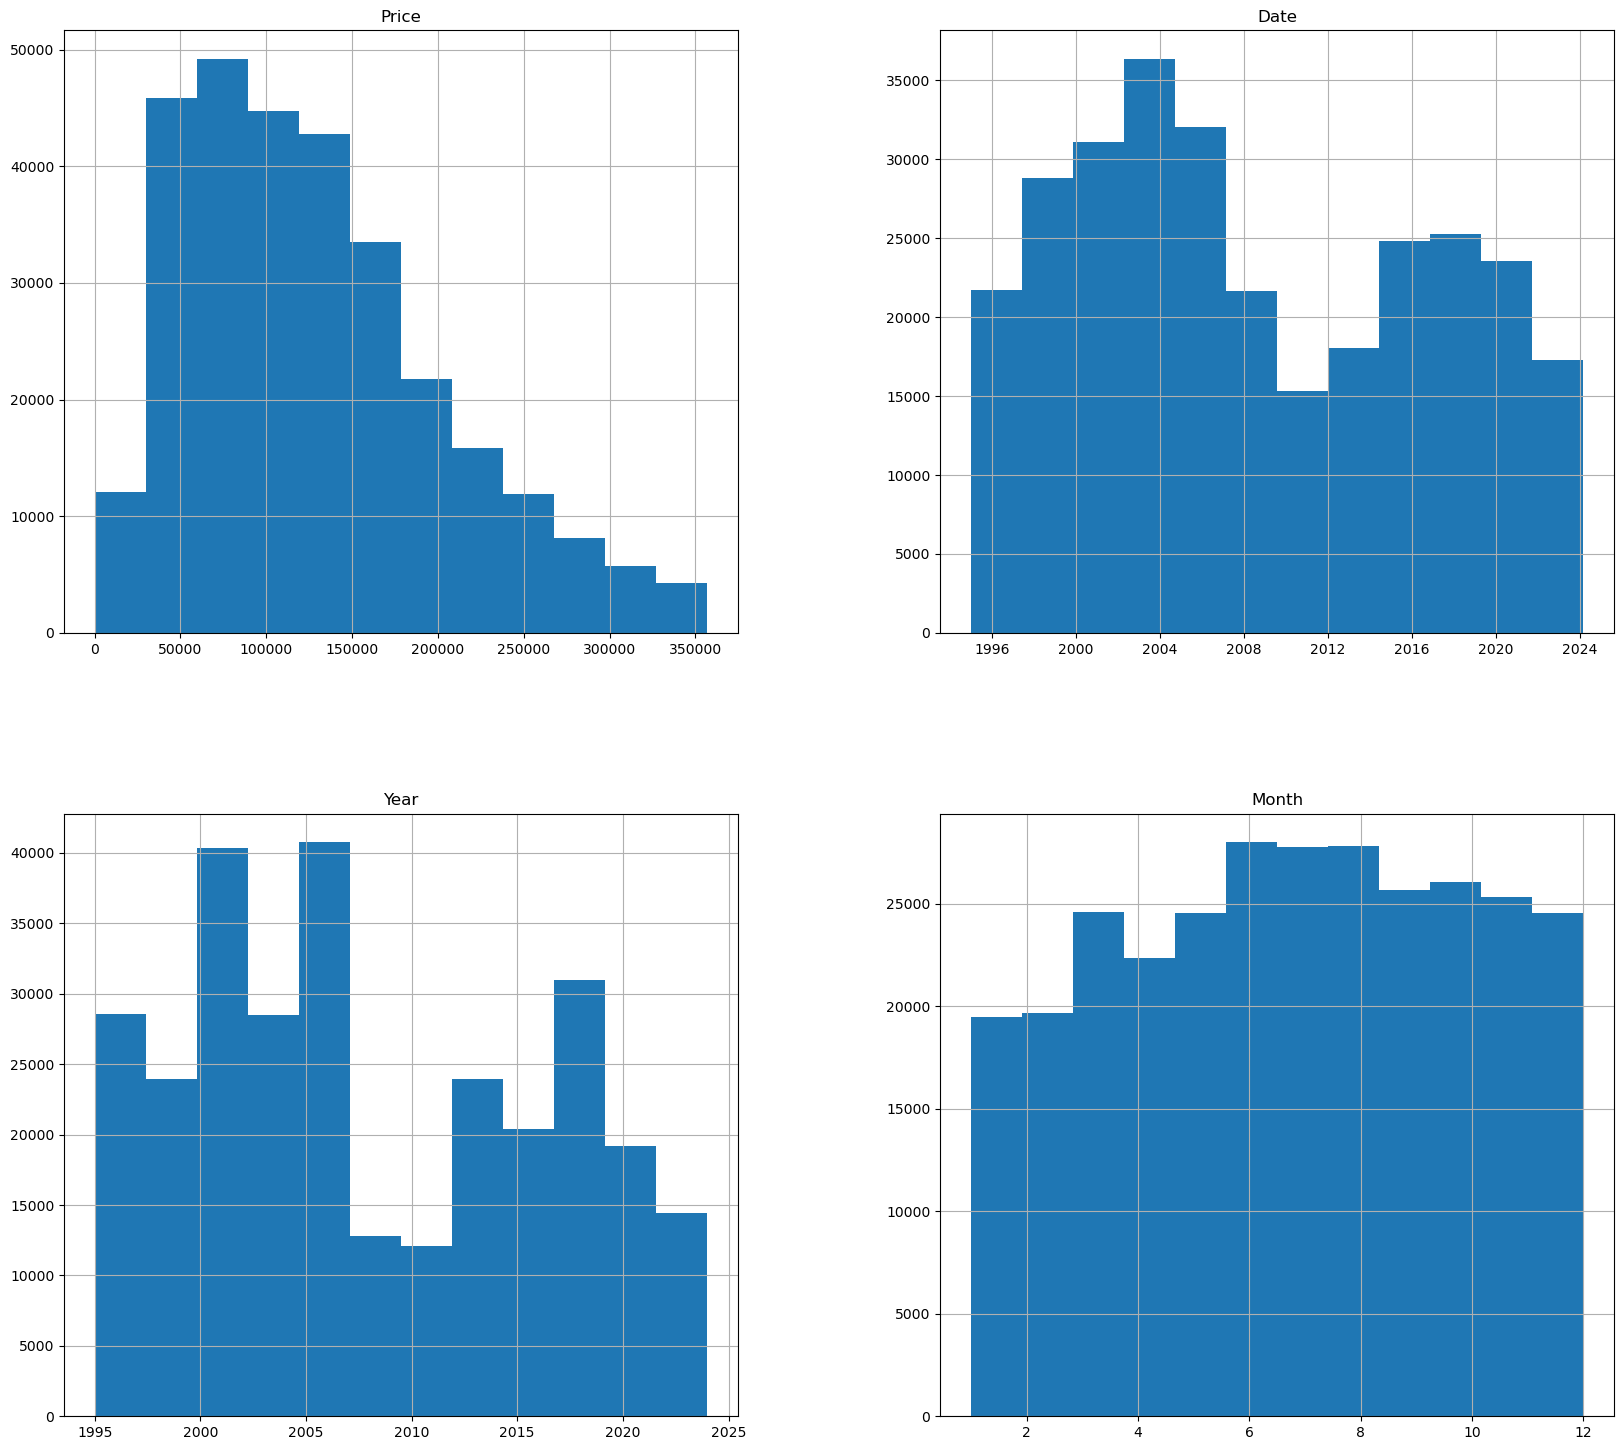

In [21]:
dataset.hist(bins = 12, figsize = (20, 18))

### Transform categorical values

#### Transform Property type using One hot enconding

In [22]:
# Encoding Categorical Variables: Using get_dummies
values_to_encode = ['Property type', 'Old/New', 'Duration']
dataset = pd.get_dummies(dataset, columns=values_to_encode)
dataset

,Price,Date,Street,Year,Month,Property type_D,Property type_F,Property type_O,Property type_S,Property type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U
0,45000,1995-01-09,HOWDENCLOUGH ROAD,1995,1,0,0,0,1,0,1,0,1,0,0
1,53500,1995-04-28,BROOKHILL DRIVE,1995,4,0,0,0,1,0,1,0,1,0,0
2,53500,1995-06-30,CRIMPLE GREEN,1995,6,0,0,0,1,0,1,0,1,0,0
4,190000,1995-12-21,CHURCH HILL,1995,12,1,0,0,0,0,1,0,1,0,0
5,33500,1995-12-21,SHAW LANE,1995,12,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,135000,2024-01-12,INGRAM ROAD,2024,1,0,0,0,0,1,1,0,1,0,0
325913,161000,2024-01-19,WARRELS STREET,2024,1,0,0,0,0,1,1,0,1,0,0
325914,132500,2024-01-19,HENCONNER LANE,2024,1,0,1,0,0,0,1,0,0,1,0
325915,345000,2024-01-12,WEAVERS FOLD,2024,1,0,0,0,0,1,1,0,1,0,0


In [23]:
# Use label encoding for street
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'street' column
dataset['street_encoded'] = encoder.fit_transform(dataset['Street'])
dataset_copy = dataset.copy()
dataset_copy = dataset_copy.drop(['Street'], axis=1)
dataset_copy

,Price,Date,Year,Month,Property type_D,Property type_F,Property type_O,Property type_S,Property type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,street_encoded
0,45000,1995-01-09,1995,1,0,0,0,1,0,1,0,1,0,0,3791
1,53500,1995-04-28,1995,4,0,0,0,1,0,1,0,1,0,0,1155
2,53500,1995-06-30,1995,6,0,0,0,1,0,1,0,1,0,0,1948
4,190000,1995-12-21,1995,12,1,0,0,0,0,1,0,1,0,0,1602
5,33500,1995-12-21,1995,12,0,1,0,0,0,1,0,0,1,0,6658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,135000,2024-01-12,2024,1,0,0,0,0,1,1,0,1,0,0,3847
325913,161000,2024-01-19,2024,1,0,0,0,0,1,1,0,1,0,0,7912
325914,132500,2024-01-19,2024,1,0,1,0,0,0,1,0,0,1,0,3451
325915,345000,2024-01-12,2024,1,0,0,0,0,1,1,0,1,0,0,7944


Transformed Skewness: 0.03


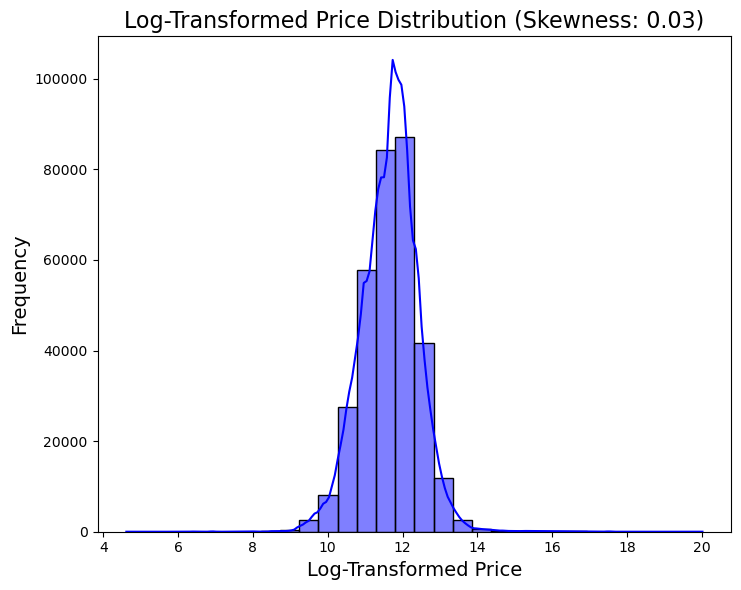

In [24]:
# Perform log transformation
log_transformed_data = np.log(price + 1)  # Adding 1 to avoid log(0)

# Calculate skewness after transformation
transformed_skewness = skew(log_transformed_data)
print(f'Transformed Skewness: {transformed_skewness:.2f}') 
# Plotting the original and log-transformed distributions
plt.figure(figsize=(14, 6)) 
# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, bins=30, color='blue')
plt.title(f'Log-Transformed Price Distribution (Skewness: {transformed_skewness:.2f})', fontsize=16)
plt.xlabel('Log-Transformed Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

In [25]:
log_transformed_data

0        10.714
1        10.887
2        10.887
3        12.128
4        12.155
          ...  
325912   11.813
325913   11.989
325914   11.794
325915   12.751
325916   12.181
Name: Price, Length: 325917, dtype: float64

### Scaling/Normalization: Apply scaling to the Price

In [26]:
# Fit and transform the 'Price' data
# Reshape data using .values.reshape(-1, 1) because scaler expects 2D array
dataset_copy['Normalized Price'] = log_transformed_data
dataset_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 295889 entries, 0 to 325916
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             295889 non-null  int64         
 1   Date              295889 non-null  datetime64[ns]
 2   Year              295889 non-null  int64         
 3   Month             295889 non-null  int64         
 4   Property type_D   295889 non-null  uint8         
 5   Property type_F   295889 non-null  uint8         
 6   Property type_O   295889 non-null  uint8         
 7   Property type_S   295889 non-null  uint8         
 8   Property type_T   295889 non-null  uint8         
 9   Old/New_N         295889 non-null  uint8         
 10  Old/New_Y         295889 non-null  uint8         
 11  Duration_F        295889 non-null  uint8         
 12  Duration_L        295889 non-null  uint8         
 13  Duration_U        295889 non-null  uint8         
 14  stre

In [27]:
numeric_data = dataset_copy.drop(['Date'], axis=1)

In [28]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295889 entries, 0 to 325916
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             295889 non-null  int64         
 1   Date              295889 non-null  datetime64[ns]
 2   Year              295889 non-null  int64         
 3   Month             295889 non-null  int64         
 4   Property type_D   295889 non-null  uint8         
 5   Property type_F   295889 non-null  uint8         
 6   Property type_O   295889 non-null  uint8         
 7   Property type_S   295889 non-null  uint8         
 8   Property type_T   295889 non-null  uint8         
 9   Old/New_N         295889 non-null  uint8         
 10  Old/New_Y         295889 non-null  uint8         
 11  Duration_F        295889 non-null  uint8         
 12  Duration_L        295889 non-null  uint8         
 13  Duration_U        295889 non-null  uint8         
 14  stre

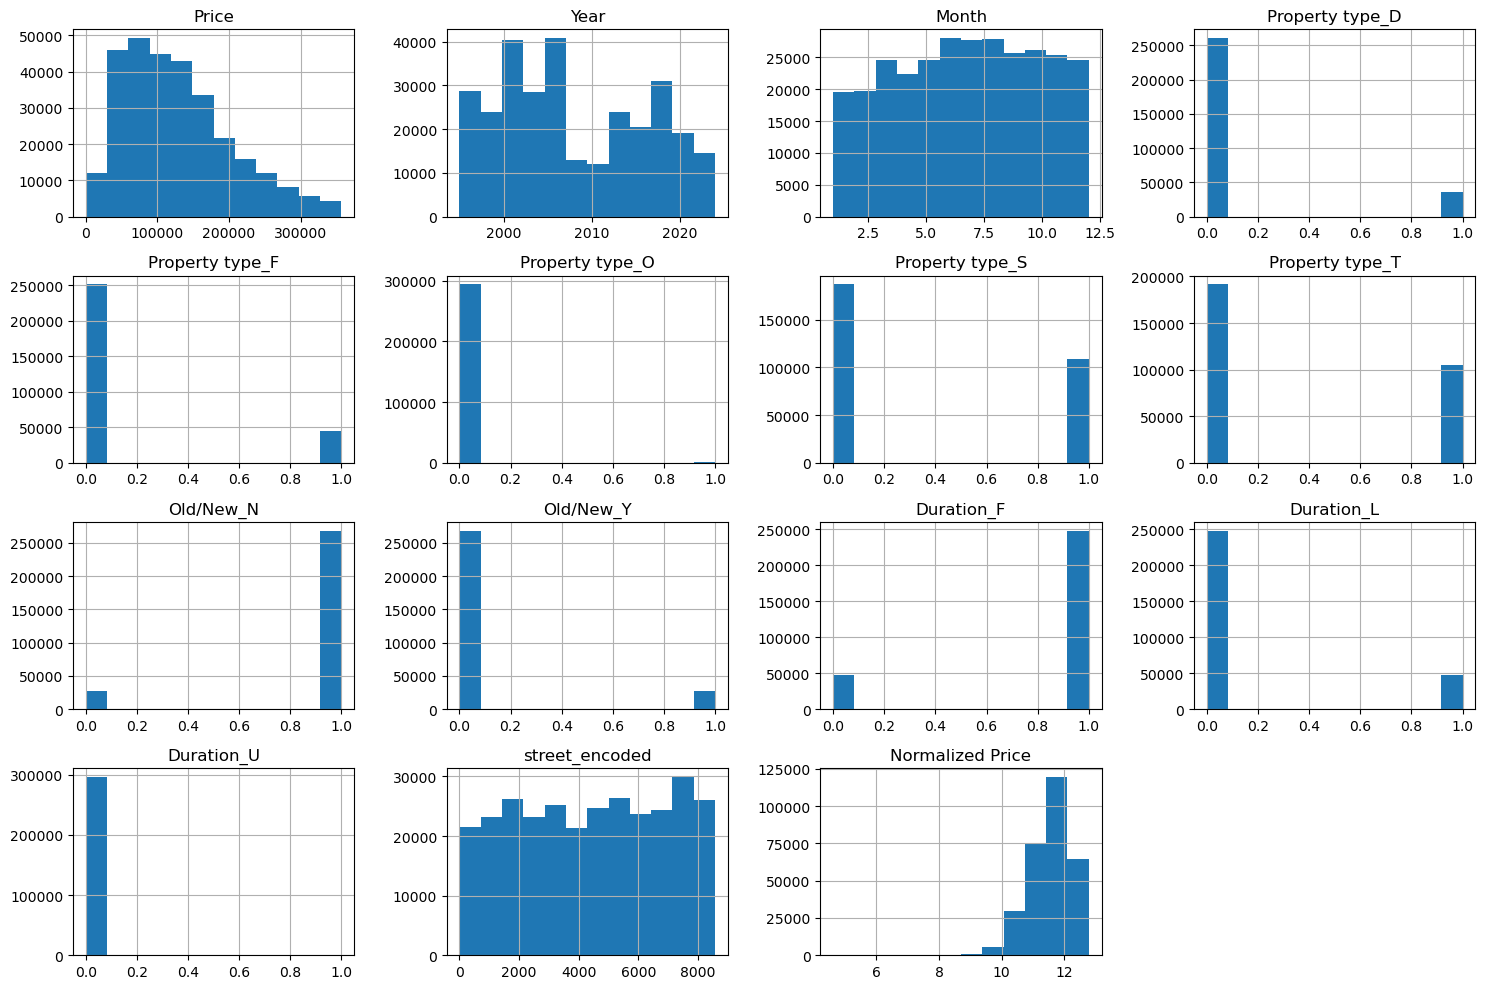

In [29]:
numeric_data
numeric_data.hist(bins=12, figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\odigi\AppData\Local\Temp\ipykernel_27704\3418523279.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


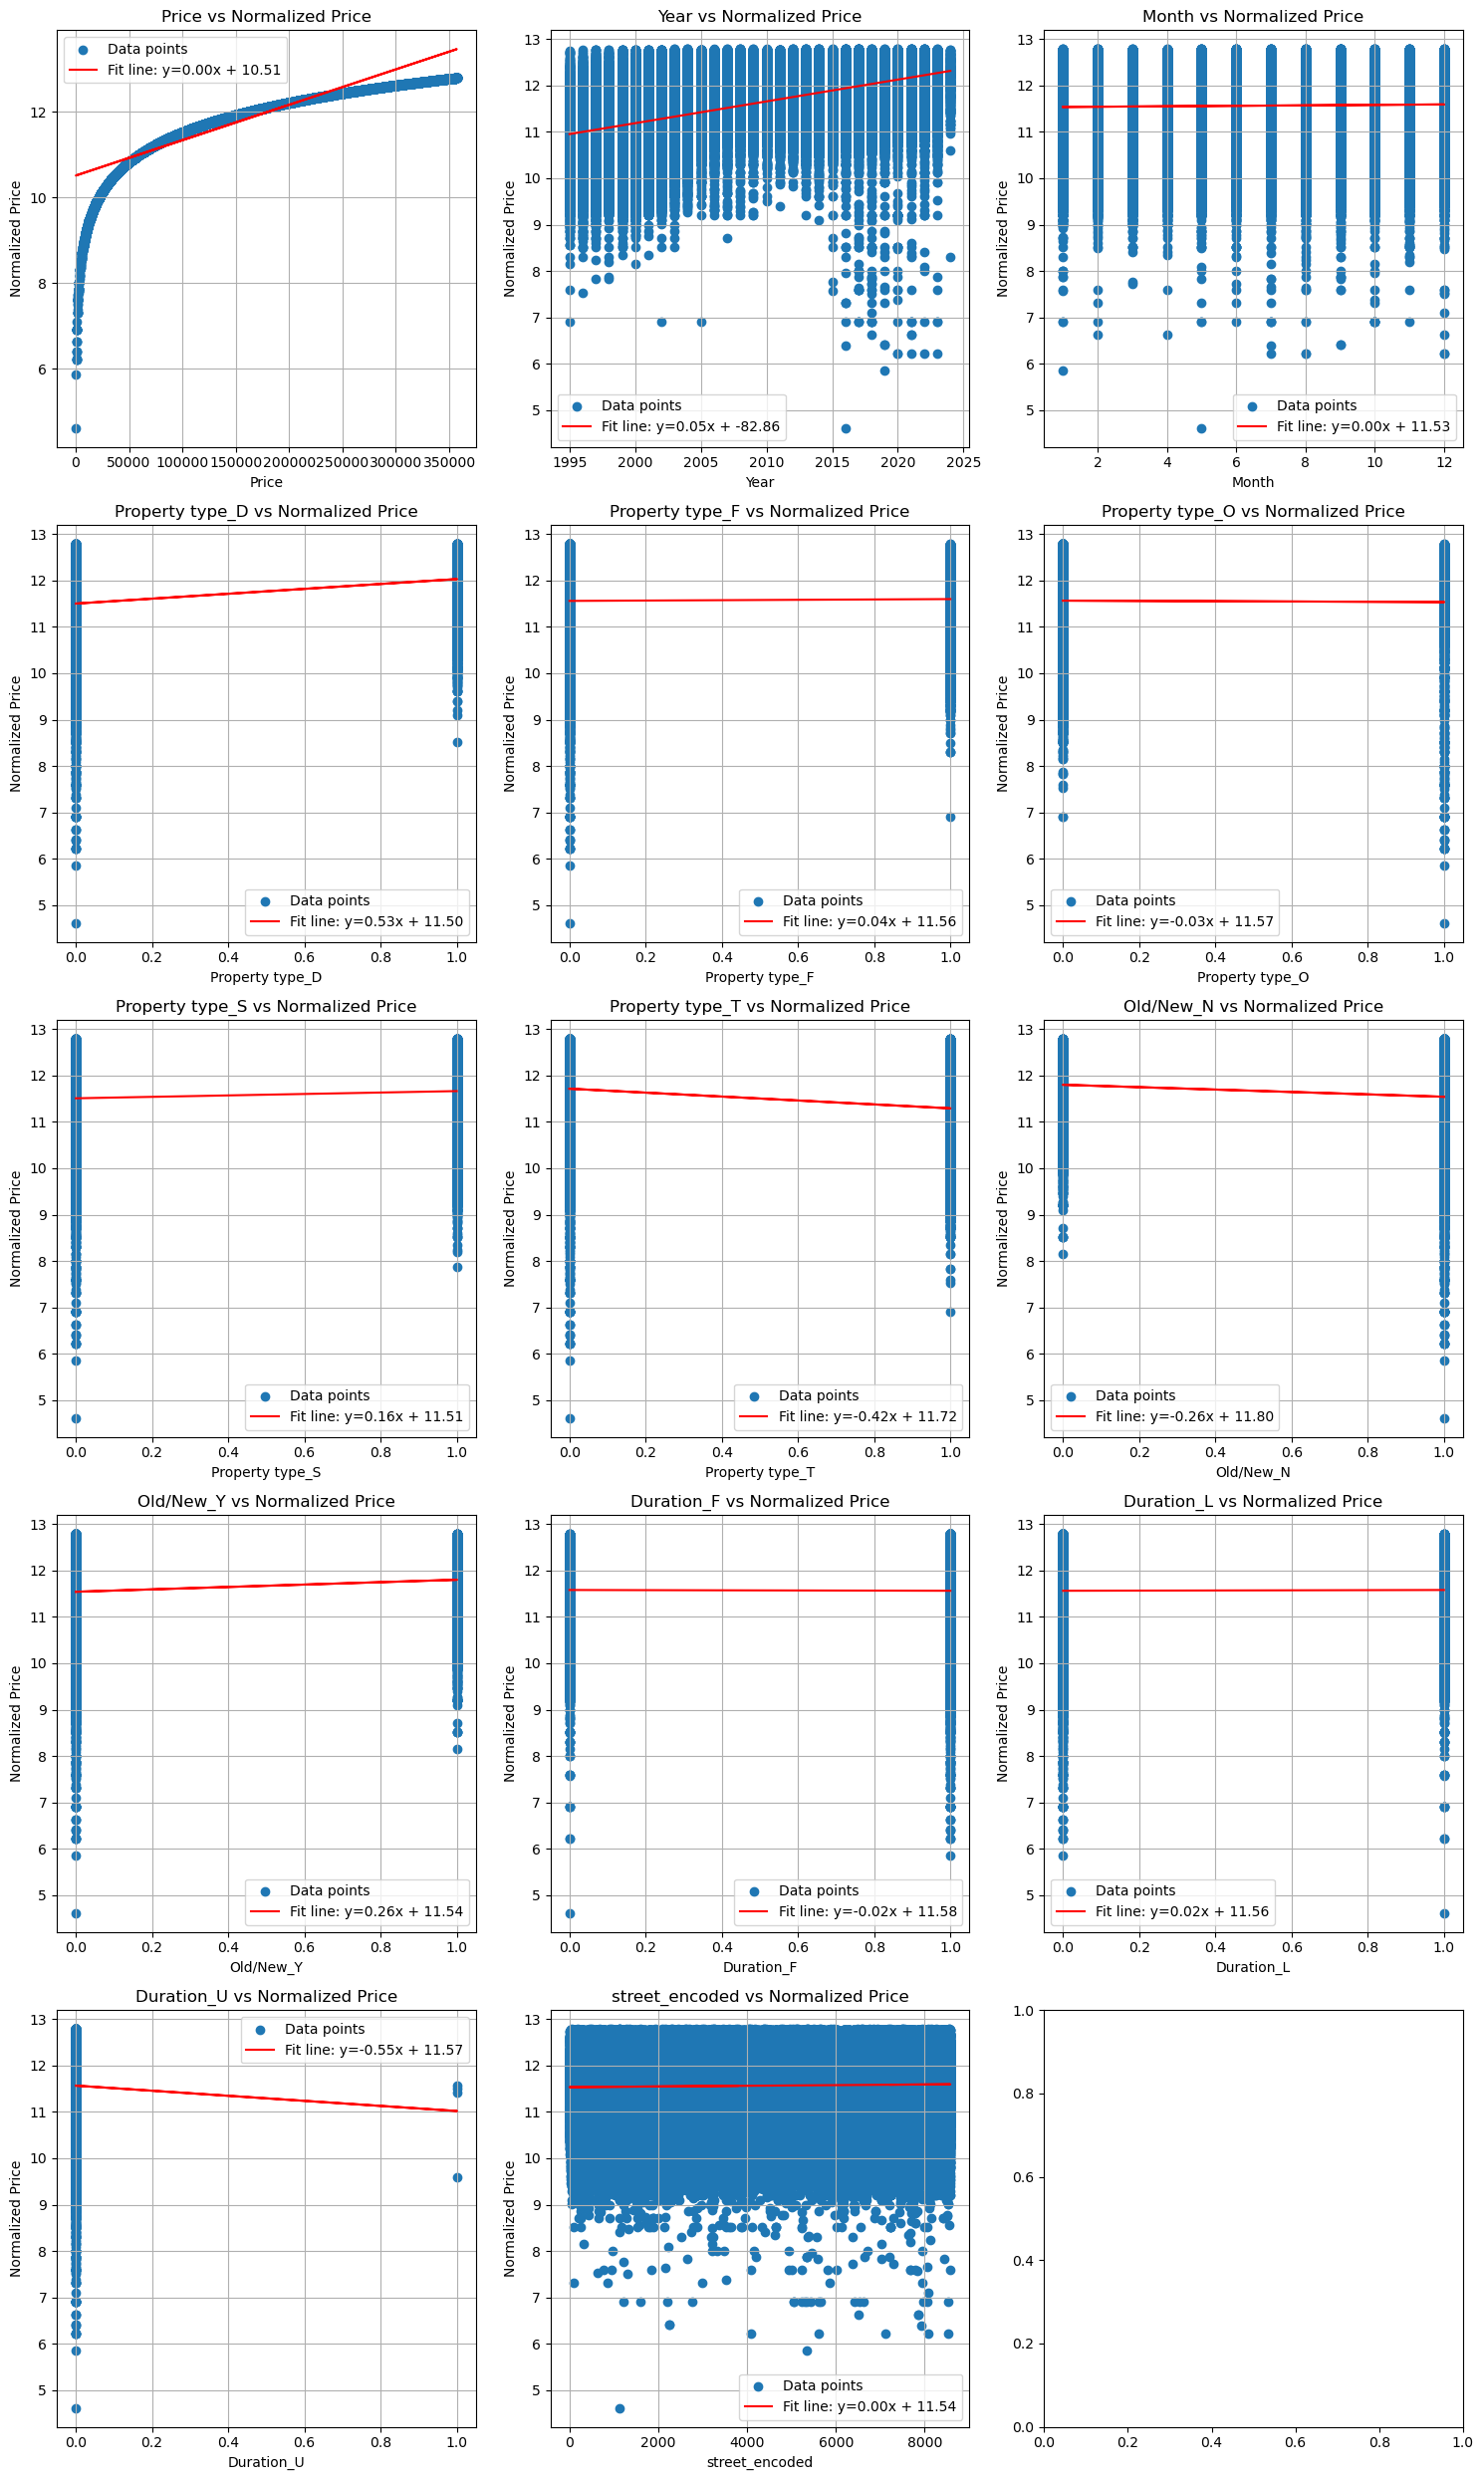

In [30]:
# # Create scatter plots with linear fit lines
# Create subplots
num_features = len(numeric_data.columns) - 1  # Exclude 'Normalized Price'
num_cols = 3  # Number of columns in the plot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against 'Normalized Price'
for i, column in enumerate(numeric_data.columns):
    if column != 'Normalized Price':
        ax = axes[i]
        ax.scatter(numeric_data[column], numeric_data['Normalized Price'], label='Data points')
        
        # Fit a linear model
        m, b = np.polyfit(numeric_data[column], numeric_data['Normalized Price'], 1)
        ax.plot(numeric_data[column], m * numeric_data[column] + b, color='red', label=f'Fit line: y={m:.2f}x + {b:.2f}')
        
        ax.set_title(f'{column} vs Normalized Price')
        ax.set_xlabel(column)
        ax.set_ylabel('Normalized Price')
        ax.legend()
        ax.grid(True)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Exploration (Exploratory Data Analysis)

Text(0, 0.5, 'Mean House Price over Years')

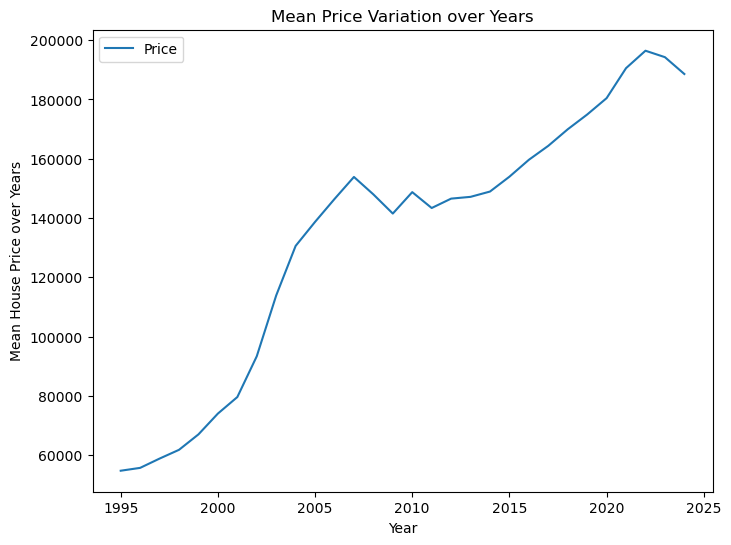

In [32]:
Paid_Price_series=dataset_copy.groupby(['Year'])['Price'].mean().reset_index()
Paid_Price_series.set_index('Year', inplace=True)
ax=Paid_Price_series.plot(figsize= (8,6), title = 'Mean Price Variation over Years')#, xlabel='Years',ylabel = 'Mean Price Variation over Years')

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Mean House Price over Years")

[Text(0.5, 1.0, 'SalePrice distribution')]

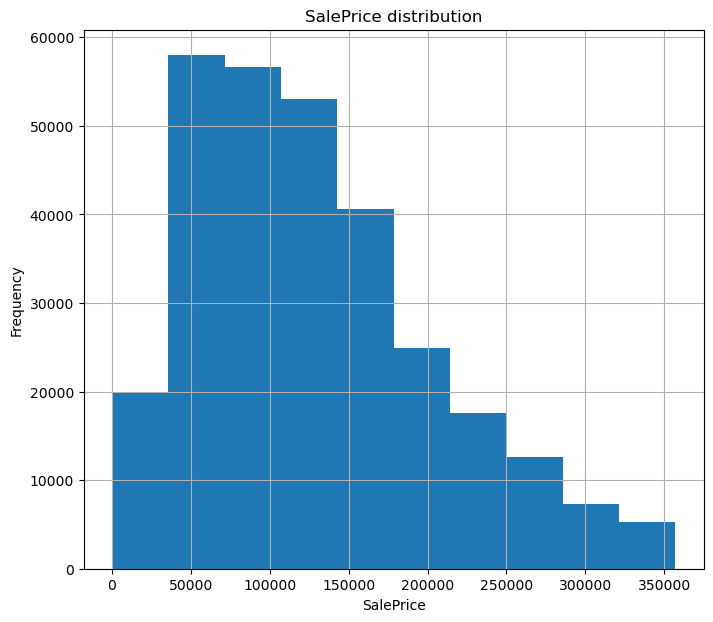

In [33]:
f, ax = plt.subplots(figsize=(8, 7))
dataset_copy['Price'].hist()
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

<Axes: >

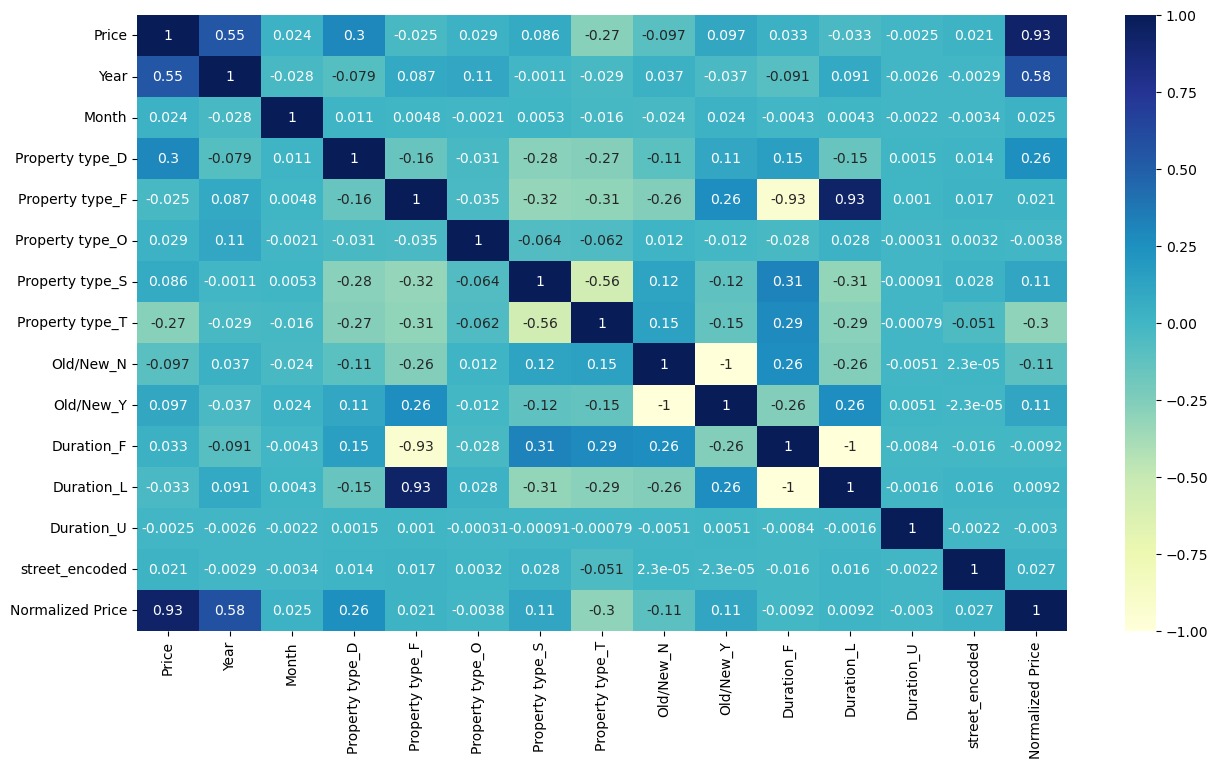

In [34]:
correlation_matrix = dataset_copy.drop(['Date'], axis=1).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [44]:
normalize = dataset_copy.copy()
normalize

,Price,Date,Year,Month,Property type_D,Property type_F,Property type_O,Property type_S,Property type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,street_encoded,Normalized Price
0,45000,1995-01-09,1995,1,0,0,0,1,0,1,0,1,0,0,3791,10.714
1,53500,1995-04-28,1995,4,0,0,0,1,0,1,0,1,0,0,1155,10.887
2,53500,1995-06-30,1995,6,0,0,0,1,0,1,0,1,0,0,1948,10.887
4,190000,1995-12-21,1995,12,1,0,0,0,0,1,0,1,0,0,1602,12.155
5,33500,1995-12-21,1995,12,0,1,0,0,0,1,0,0,1,0,6658,10.419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325912,135000,2024-01-12,2024,1,0,0,0,0,1,1,0,1,0,0,3847,11.813
325913,161000,2024-01-19,2024,1,0,0,0,0,1,1,0,1,0,0,7912,11.989
325914,132500,2024-01-19,2024,1,0,1,0,0,0,1,0,0,1,0,3451,11.794
325915,345000,2024-01-12,2024,1,0,0,0,0,1,1,0,1,0,0,7944,12.751


# Model Selection

## Split Data into test and training set

In [36]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = normalize.drop(['Price', 'Normalized Price', 'Date'], axis=1)
y = normalize['Normalized Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test


## Performance Metric test

,Metric,Score
0,MSE,0.230
1,RMSE,0.480
2,MAE,0.369
3,R-squared,0.489


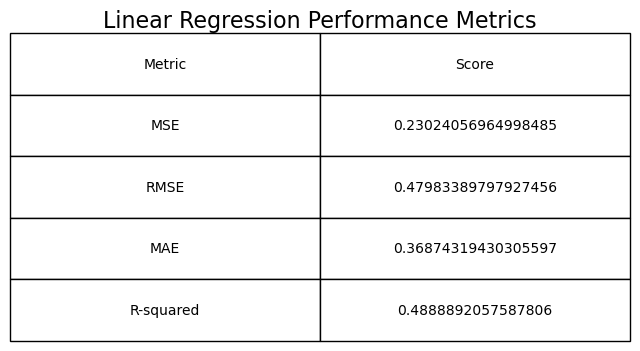

Model: Linear Regression: 
Mean Squared Error (MSE): 0.2302 (Poor Performance.)
Root Mean Squared Error (RMSE): 0.4798 (Poor Performance.)
Mean Absolute Error (MAE): 0.3687 (Poor Performance.)
R-Squared (R2): 0.4889 (Poor Performance.)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Thresholds for performance evaluation on logarithmic scale based on (Botchkarev, A. (2018).)
mse_threshold = 0.01
rmse_threshold = 0.1
mae_threshold = 0.1
r2_threshold = 0.7

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_prediction_linear = linear_model.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_prediction_linear)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_prediction_linear)
r_squared_lr = r2_score(y_test, y_prediction_linear)

# Create a DataFrame to display the scores
scores = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Score': [mse_lr, rmse_lr, mae_lr, r_squared_lr]
}

scores_df = pd.DataFrame(scores) 
# Display the DataFrame
display(scores_df)
# Plot the table
 
fig, ax = plt.subplots(figsize=(8, 2))  # Set the size accordingly
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=scores_df.values, colLabels=scores_df.columns, cellLoc='center', loc='center')
# Increase the height of each cell
for key, cell in table.get_celld().items():
    cell.set_height(0.4)  # Adjust the height value as needed
# Show the plot (optional)
ax.text(0.5, 1.58, 'Linear Regression Performance Metrics', ha='center', va='center', transform=ax.transAxes, fontsize=16)

plt.show()
print("Model: Linear Regression: ")
print(f"Mean Squared Error (MSE): {mse_lr:.4f} {'(Good Performance.)' if mse_lr < mse_threshold else '(Poor Performance.)'}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f} {'(Good Performance.)' if rmse_lr < rmse_threshold else '(Poor Performance.)'}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f} {'(Good Performance.)' if mae_lr < mae_threshold else '(Poor Performance.)'}")
print(f"R-Squared (R2): {r_squared_lr:.4f} {'(Good Performance.)' if r_squared_lr >= r2_threshold else '(Poor Performance.)'}")


,Metric,Score
0,MSE,0.129
1,RMSE,0.359
2,MAE,0.245
3,R-squared,0.714


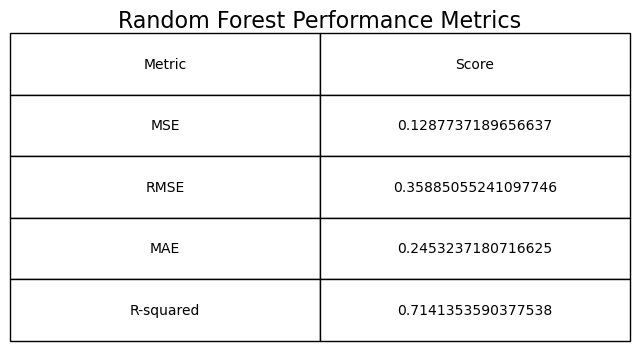

Model: Random Forest: 
Mean Squared Error (MSE): 0.1288 (Poor Performance.)
Root Mean Squared Error (RMSE): 0.3589 (Poor Performance.)
Mean Absolute Error (MAE): 0.2453 (Poor Performance.)
R-Squared (R2): 0.7141 (Good Performance.)


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_prediction_rf = random_forest_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_prediction_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_prediction_rf)
r_squared_rf = r2_score(y_test, y_prediction_rf)

# Create a DataFrame to display the scores
scores = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Score': [mse_rf, rmse_rf, mae_rf, r_squared_rf]
}

scores_df = pd.DataFrame(scores) 
# Display the DataFrame
display(scores_df)
# Plot the table
fig, ax = plt.subplots(figsize=(8, 2))  # Set the size accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=scores_df.values, colLabels=scores_df.columns, cellLoc='center', loc='center', ) 
# Increase the height of each cell
for key, cell in table.get_celld().items():
    cell.set_height(0.4)  # Adjust the height value as needed
# Show the plot (optional)
ax.text(0.5, 1.58, 'Random Forest Performance Metrics', ha='center', va='center', transform=ax.transAxes, fontsize=16)
plt.show() 
print("Model: Random Forest: ")
print(f"Mean Squared Error (MSE): {mse_rf:.4f} {'(Good Performance.)' if mse_rf < mse_threshold else '(Poor Performance.)'}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f} {'(Good Performance.)' if rmse_rf < rmse_threshold else '(Poor Performance.)'}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f} {'(Good Performance.)' if mae_rf < mae_threshold else '(Poor Performance.)'}")
print(f"R-Squared (R2): {r_squared_rf:.4f} {'(Good Performance.)' if r_squared_rf >= r2_threshold else '(Poor Performance.)'}")

,Metric,Score
0,MSE,0.176
1,RMSE,0.419
2,MAE,0.312
3,R-squared,0.610


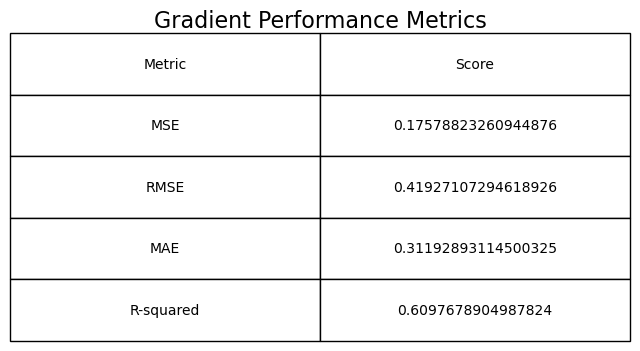

Model: Gradient Boosting: 
Mean Squared Error (MSE): 0.1758 (Poor Performance.)
Root Mean Squared Error (RMSE): 0.4193 (Poor Performance.)
Mean Absolute Error (MAE): 0.3119 (Poor Performance.)
R-Squared (R2): 0.6098 (Poor Performance.)


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_prediction_gb = gradient_boosting_model.predict(X_test)


# Calculate metrics
mse_gb = mean_squared_error(y_test, y_prediction_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_prediction_gb)
r_squared_gb = r2_score(y_test, y_prediction_gb)

# Create a DataFrame to display the scores
scores = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Score': [mse_gb, rmse_gb, mae_gb, r_squared_gb]
}

scores_df = pd.DataFrame(scores) 
# Display the DataFrame
display(scores_df)
# Plot the table
fig, ax = plt.subplots(figsize=(8, 2))  # Set the size accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=scores_df.values, colLabels=scores_df.columns, cellLoc='center', loc='center', ) 
# Increase the height of each cell
for key, cell in table.get_celld().items():
    cell.set_height(0.4)  # Adjust the height value as needed
# Show the plot (optional)
ax.text(0.5, 1.58, 'Gradient Performance Metrics', ha='center', va='center', transform=ax.transAxes, fontsize=16)
plt.show() 
print("Model: Gradient Boosting: ")
print(f"Mean Squared Error (MSE): {mse_gb:.4f} {'(Good Performance.)' if mse_gb <= mse_threshold else '(Poor Performance.)'}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f} {'(Good Performance.)' if rmse_gb <= rmse_threshold else '(Poor Performance.)'}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f} {'(Good Performance.)' if mae_gb <= mae_threshold else '(Poor Performance.)'}")
print(f"R-Squared (R2): {r_squared_gb:.4f} {'(Good Performance.)' if r_squared_gb >= r2_threshold else '(Poor Performance.)'}")

## Cross-Validation

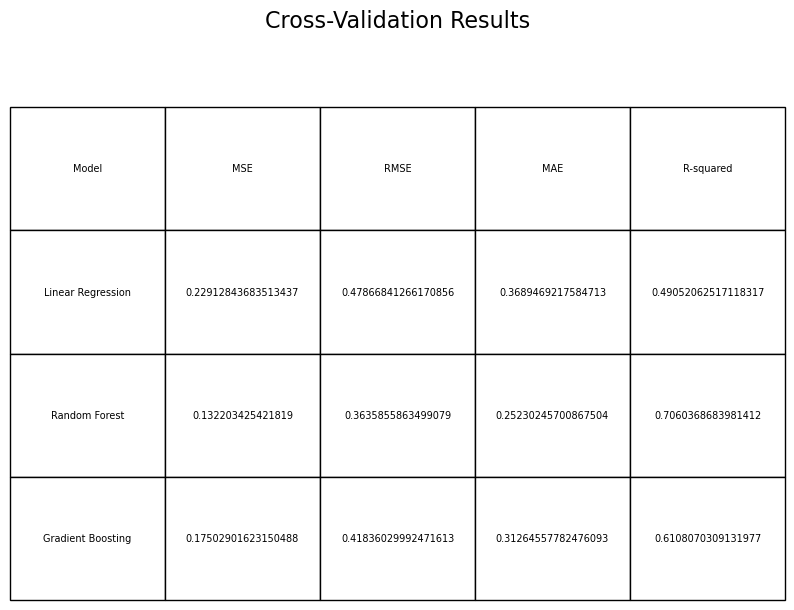

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, Y, kf):
    mse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    mae_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
    
    return {
        'MSE': -mse_scores.mean(),
        'RMSE': rmse_scores.mean(),
        'MAE': -mae_scores.mean(),
        'R-squared': r2_scores.mean()
    }

# Evaluate each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, kf)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R-squared']

# Plot the table
fig, ax = plt.subplots(figsize=(10, 4))  # Set the size accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
# Increase the height of each cell
for key, cell in table.get_celld().items():
    cell.set_height(0.4)  # Adjust the height value as needed
# Show the plot (optional)
ax.text(0.5, 1.58, 'Cross-Validation Results', ha='center', va='center', transform=ax.transAxes, fontsize=16)
plt.show()

 ### Get parameters for best fit

In [ ]:
# # Define parameter grid for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search for random forest
grid_search_rf = GridSearchCV(random_forest_model_2, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters for random forest
best_params_rf = grid_search_rf.best_params_

# Define parameter grid for gradient boosting
param_grid_gbr = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}

# Grid search for gradient boosting
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5)
grid_search_gbr.fit(X_train, residuals)

# Best parameters for gradient boosting
best_params_gbr = grid_search_gbr.best_params_

print(f'Best parameters for Random Forest: {best_params_rf}')
print(f'Best parameters for Gradient Boosting: {best_params_gbr}')

# Model Evaluation

RMSE: 0.33796413282545384
R-squared: 0.746443687904716


,Metric,Score
0,MSE,0.114
1,RMSE,0.338
2,MAE,0.232
3,R-squared,0.746


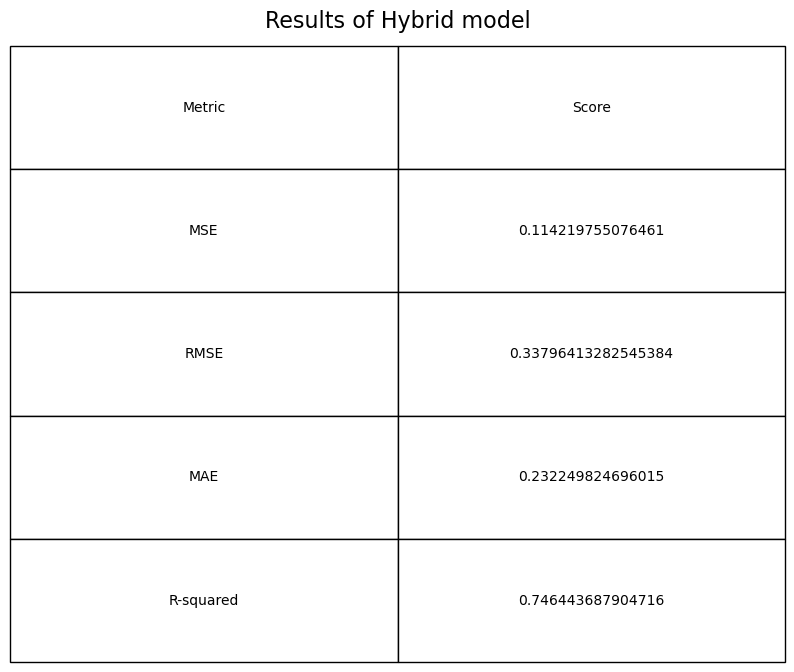

In [43]:
from sklearn.model_selection import GridSearchCV

GradientBoostingRegressor()
random_forest_model_2 = RandomForestRegressor(n_estimators=500, min_samples_split = 10, random_state=42)
random_forest_model_2.fit(X_train, y_train)
# Predict on the training data
y_prediction_rf = random_forest_model_2.predict(X_train)
# Calculate the residuals
residuals = y_train - y_prediction_rf

# Initialize the gradient boosting regressor
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=5, random_state=42)

# Fit the model on residuals
gbr.fit(X_train, residuals)

# Predict on the test data using both models
y_pred_rf_test = random_forest_model_2.predict(X_test)
y_pred_gbr_test = gbr.predict(X_test)

# Combine predictions
final_predictions = y_pred_rf_test + y_pred_gbr_test

# Calculate RMSE
rmse = mean_squared_error(y_test, final_predictions, squared=False)
# Calculate R-squared
r2 = r2_score(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions) 
mae = mean_absolute_error(y_test, final_predictions) 

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Create a DataFrame to display the scores
scores = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Score': [mse, rmse, mae, r2]
}

scores_df = pd.DataFrame(scores) 
# Display the DataFrame
display(scores_df)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 4))  # Set the size accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=scores_df.values, colLabels=scores_df.columns, cellLoc='center', loc='center')
# Increase the height of each cell
for key, cell in table.get_celld().items():
    cell.set_height(0.4)  # Adjust the height value as needed
# Show the plot (optional)
ax.text(0.5, 1.58, 'Results of Hybrid model', ha='center', va='center', transform=ax.transAxes, fontsize=16)
plt.show()



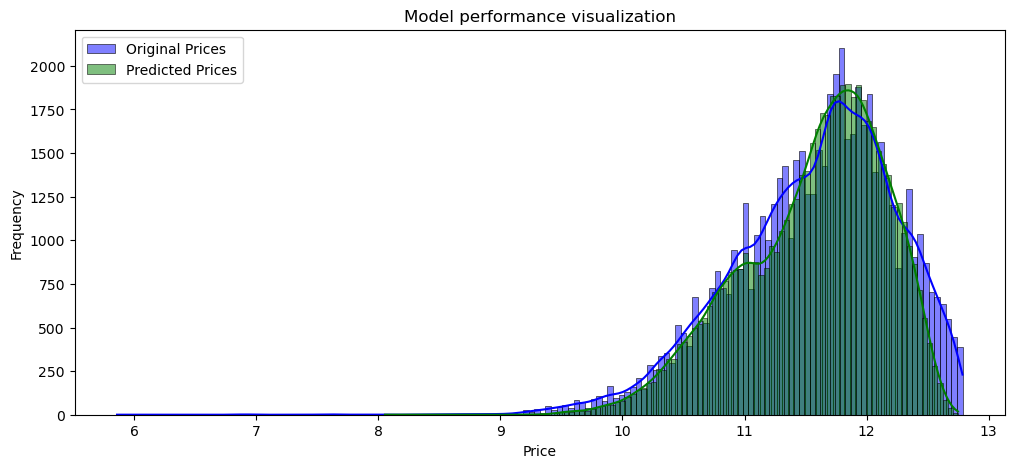

In [42]:
# Visualization of results
plt.figure(figsize=(12, 5))
sns.histplot(y_test, kde=True, color='blue', label='Original Prices')
sns.histplot(final_predictions, kde=True, color='green', label='Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Model performance visualization')
plt.legend()
plt.show()